# Unsupervised Learning - Exercise

```In this exercise you will experience with K-Means, and PCA, and will do some use of them for handling practical problems.```

~```Gilad Royz & Itai Haran```

# Part 1 - Clustering

```In this question you are asked to examine the 3 clustering algorithms: KMeans, DBscan and GaussianMixture.```

```You will have to generate manipulative datasets, and demonstrate the weaknesses of each method. That is, for each one of the clustering methods, generate a dataset such that one of the methods will fail, and the others will not.
Deal with the model's hyper parameters, and conclude for yourself how sensitive they are.```

```For each dataset draw your results using your favorite visualization tool.```

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

colors = dict(zip(list(range(3))+[-1], [0.1, 0.4 ,0.7, 0.9]))

### dataset for example
data = np.concatenate([np.random.normal(0, 0.2, (1000, 2)),\
                       np.random.normal(0.8, 0.1, (1000, 2)),\
                       np.random.random((1000,2)) + np.array([1.8,0.2])])

clf_kmeans = KMeans(3, n_jobs=-1, max_iter=100)
y_kmeans = clf_kmeans.fit_predict(data)

clf_dbscan = DBSCAN(eps = 0.3, min_samples = 10, n_jobs = -1)
y_dbscan = clf_dbscan.fit_predict(data)

clf_gaussian = GaussianMixture(n_components=3)
clf_gaussian.fit(data)
y_gaussian = clf_gaussian.predict(data)

f, axarr = plt.subplots(3, sharex=True)
axarr[0].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_kmeans)))
axarr[1].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_dbscan)))
axarr[2].scatter(data[:,0], data[:,1], c = list(map(lambda x: colors[x], y_gaussian)))
plt.show()

```Answer the following questions based on what you learned from the previous question:```
- ```Which method is easiest to use?```
- ```Which method is the fastest to use?```

```We will now use K-Means to quantize image colors:```

```First load the given celebrity image from the image folder (can be found in:```
https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing)

In [ ]:
import cv2

In [ ]:
img = cv2.imread('images/Alicia Vikander/1.jpg')[:,:,::-1]
img_array = np.array(img)

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_array)

```Every pixel in the image is composed of three colors (Red, Green, Blue), and therefore, every pixel is a vector: (r,g,b).```
```Create a list of every color pixel in the image: (array.reshape will work)```

```Train a K-Means model with k=10 on the list of colors:```

In [ ]:
from sklearn.cluster import KMeans

```Now replace every color vector with the vector of centroid bector of it's cluster.```
```rebuild the image and plot it. How is it compared to the original?```

```Train K-Means model with k=2,...,15, and plot the "within-cluster sum-of-squares criterion"```($R_k$)``` for all the k's.```

```(reduce the n_init if it takes too much time)```

(Explain on $R_k$ can be found in: https://scikit-learn.org/stable/modules/clustering.html#k-means)

```Can we conclude "how many clusters" are there, from the graph?```

# part 2 - Dimensionality reduction

```The goal of this part is to experience with some basic features of PCA, and have a notion about the capabilities, and uses of this method.```

```We will look on facial images of 3 celebrities, and use PCA to extract facial patterns from images.```
```We then try to use those patterns to build a classifier that can distinguish the 3 celebrities.```

In [ ]:
celebs = ['Alicia Vikander', 'Amy Adams', 'Andy Serkis']
# images folder in: https://drive.google.com/file/d/1nUk_Q-ahhUrjmUl_sM9ovb84DybuaQCe/view?usp=sharing

In [ ]:
def read_gray_image(path):
    """
    return array with:
    0-axis: height
    1-axis: width
    2-axis: color(rgb)
    """
    return cv2.cvtColor(cv2.imread(path)[:,:,::-1], cv2.COLOR_RGB2GRAY)

```First we load the face images:```

In [ ]:
import os

face_imgs = []
labels = []
for j, c in enumerate(celebs):
    
    dir_path = 'images/{}/'.format(c)
    dir_file_paths = [dir_path + i for i in os.listdir(dir_path)]
    
    temp_imgs = [read_gray_image(dir_path + i) for i in os.listdir(dir_path)]
    
    labels += [j]*len(dir_file_paths)
    face_imgs += [read_gray_image(i) for i in dir_file_paths]

```For later steps, we would like to resize all the images to have the same width x height. It is best to choose new shape that least distort the images.```

```Plot the shapes of all the images on the "width", "height" plane: (What does that remind you of?)```

```Now on the same plot, draw the point of the "avarage shape". Is it looks like it represents the trend?```

```Resize all the face images to have the "avarage shape." ( cv2.resize will work)```

```Flatten all the images into vectors, and split them randomly to train and test groups (with ratio (0.7, 0.3)).```

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

```Now train a PCA model with n_components=10 on the train set. How much variance(in %) the 10 components explain? is it good compared to the dimention of the vectors?```

```Take the 10 component vectors of the model, reshape them to the image shape, and plot all of them:```

It looks something like that:
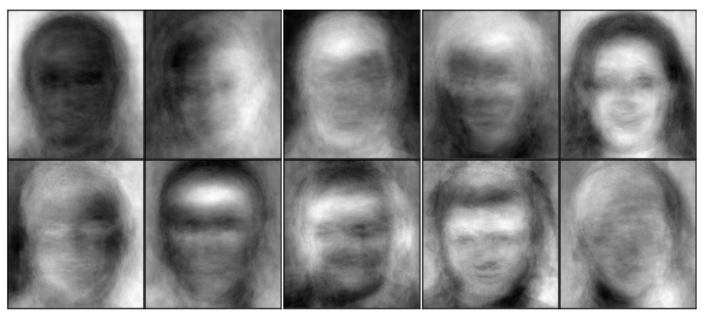

```The "faces" that we got, can roוghly be refered to as the "face patterns" that are the most dominant in the images. can you make sense of the patterns?```

```Notice that if we transform an image to the low dimension and then inverse transform it back, we actually find the "best combination of the patterns" that reconstract out image```

```Now make a PCA model with n_components=10 for the images of every celebrity in the train set (pca_1, pca_2, pca_3). And Then:```

- ```Take all the vectors from the test set.```
- ```Transform them to the low dimension.```
- ```Inverse transform them back to original dimension.```
- ```Compute "mean square error" (MSE) between the original vectors to the reconstructed version of themselves.```
- ```For every vector, mark the PCA model that gave the smallest MSE. (as prediction)```
- ```Print the "confusion matrix" of the prediction.``` (https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix

```Is it work well? If yes, try to explain why.```

## Bonus (5 pts)

```Perform the prediction process with PCA models with n_components=[1,10,20,30,40,50,60,70].```

```Plot the accuracy of the models. what is the trend of the performance when n_components increases? Is it what you expected? try to explain.```